# Importing libraries and Exploring the Dataset

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set() 

In [2]:
# Read the Dataset
insurance_df = pd.read_csv("insurance-data.csv")

In [3]:
#Display the first five dataset

insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#Info about the data shape of data, type of individual columns

insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Checking missing values and Outliers

In [5]:
# Check for the null values 

insurance_df.isna().apply(pd.value_counts)

,age,sex,bmi,children,smoker,region,charges
False,1338,1338,1338,1338,1338,1338,1338


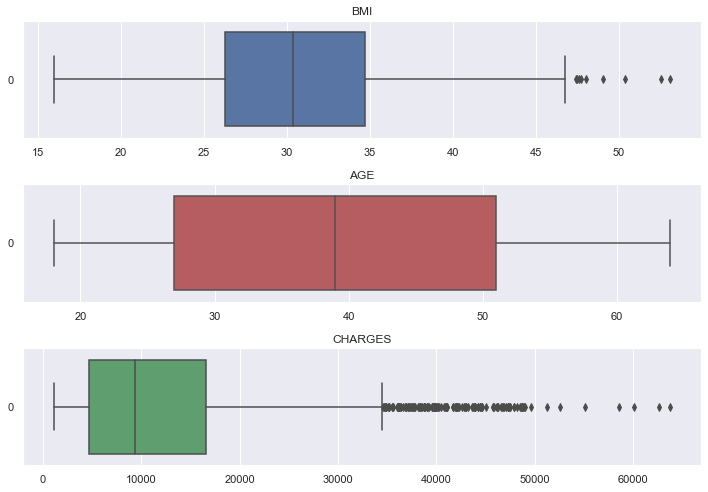

In [7]:
# Checking for the outliers
fig, ax = plt.subplots(3, 1, figsize=(10,7))
ax[0].set_title("BMI")
ax[1].set_title("AGE")
ax[2].set_title("CHARGES")
sns.boxplot(data = insurance_df.bmi, orient="h", ax=ax[0], color = "b")
sns.boxplot(data = insurance_df.age, orient="h", ax=ax[1], color = "r")
sns.boxplot(data = insurance_df.charges, orient="h", ax=ax[2], color = "g")
plt.tight_layout()

In [9]:
# a brief summary for the dataset

insurance_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


# Creating visual methods to analyze the data.

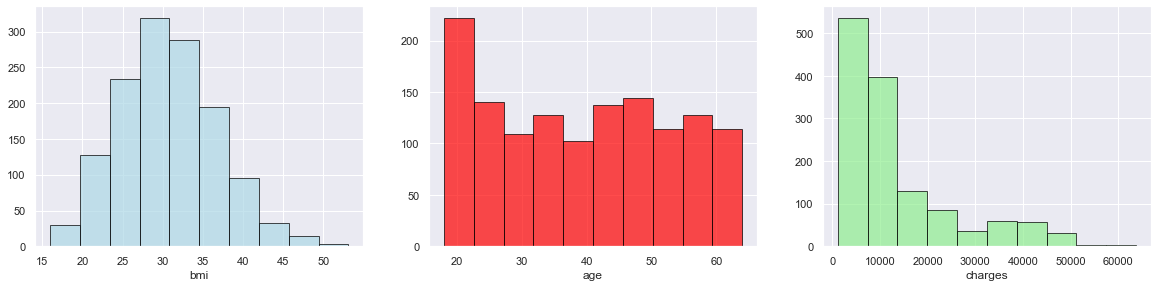

In [10]:
# Plots to see the distribution of the continuous features individually

plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
plt.hist(insurance_df.bmi, color="lightblue", edgecolor="black", alpha=0.7)
plt.xlabel("bmi")

plt.subplot(3,3,2)
plt.hist(insurance_df.age, color='red', edgecolor = 'black', alpha = 0.7)
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(insurance_df.charges, color='lightgreen', edgecolor = 'black', alpha = 0.7)
plt.xlabel('charges')

plt.show()

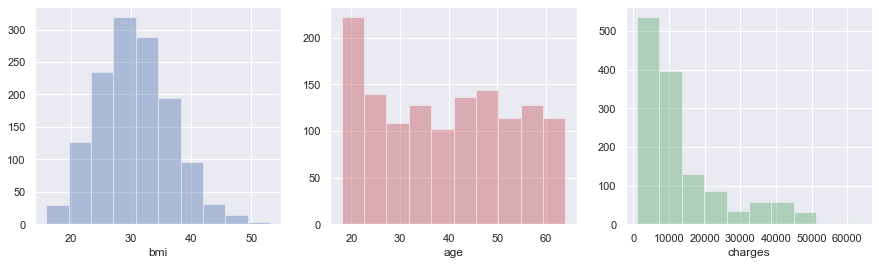

In [15]:
# Fatih hocamızın gönderdiği kod:
fig, ax = plt.subplots(1, 3, figsize=(15,4))
sns.distplot(insurance_df.bmi, ax=ax[0], color = "b", bins=10, kde=False)
sns.distplot(insurance_df.age, ax=ax[1], color = "r", bins=10, kde=False)
sns.distplot(insurance_df.charges, ax=ax[2], color = "g", bins=10, kde=False)

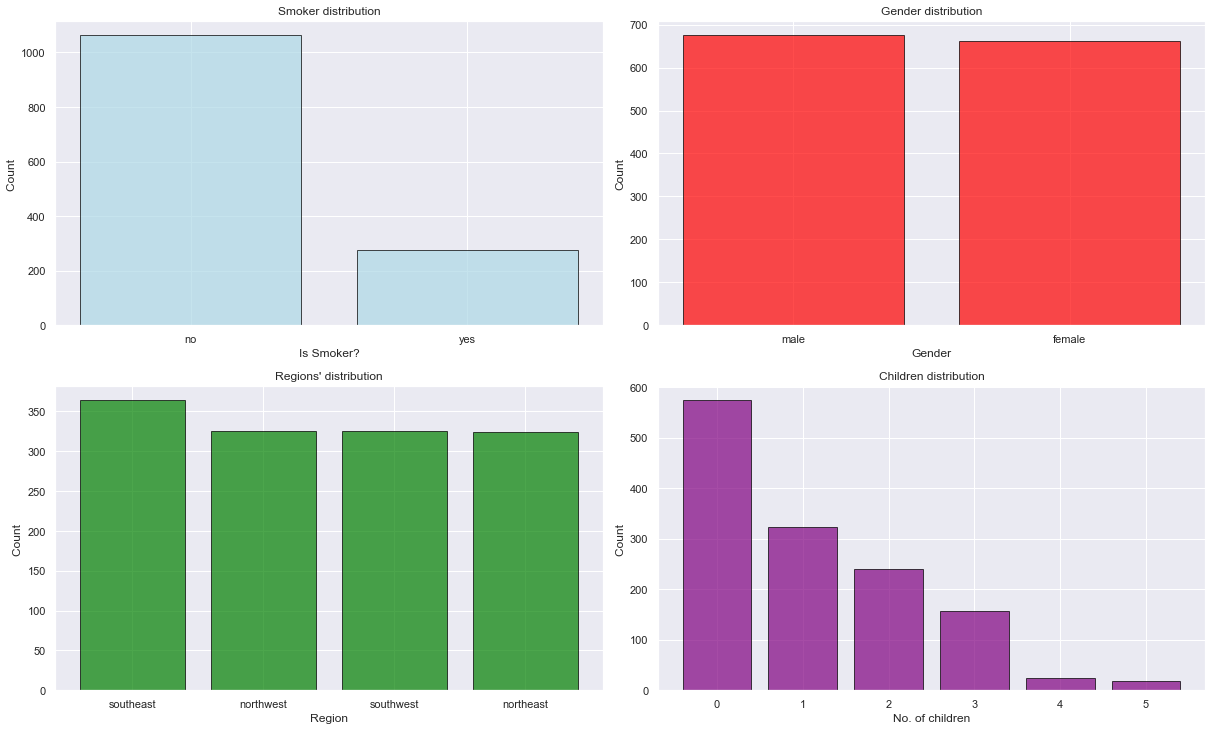

In [18]:
plt.figure(figsize=(17,20))
x = insurance_df.smoker.value_counts().index
y = [insurance_df['smoker'].value_counts()[i] for i in x]
plt.subplot(4,2,1)
plt.bar(x,y, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Is Smoker?')
plt.ylabel('Count ')
plt.title('Smoker distribution')

x1 = insurance_df.sex.value_counts().index    #Values for x-axis
y1 = [insurance_df['sex'].value_counts()[j] for j in x1]   # Count of each class on y-axis

plt.subplot(4,2,2)
plt.bar(x1,y1, align='center',color = 'red',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender distribution')

x2 = insurance_df.region.value_counts().index    #Values for x-axis
y2 = [insurance_df['region'].value_counts()[k] for k in x2]   # Count of each class on y-axis

plt.subplot(4,2,3)
plt.bar(x2,y2, align='center',color = 'green',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Region')
plt.ylabel('Count ')
plt.title("Regions' distribution")

x3 = insurance_df.children.value_counts().index    #Values for x-axis
y3 = [insurance_df['children'].value_counts()[l] for l in x3]   # Count of each class on y-axis

plt.subplot(4,2,4)
plt.bar(x3,y3, align='center',color = 'purple',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('No. of children')
plt.ylabel('Count ')
plt.title("Children distribution")
plt.tight_layout()
plt.show()

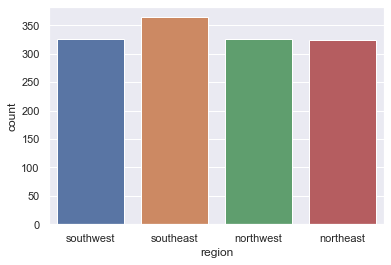

In [19]:
sns.countplot(insurance_df.region)

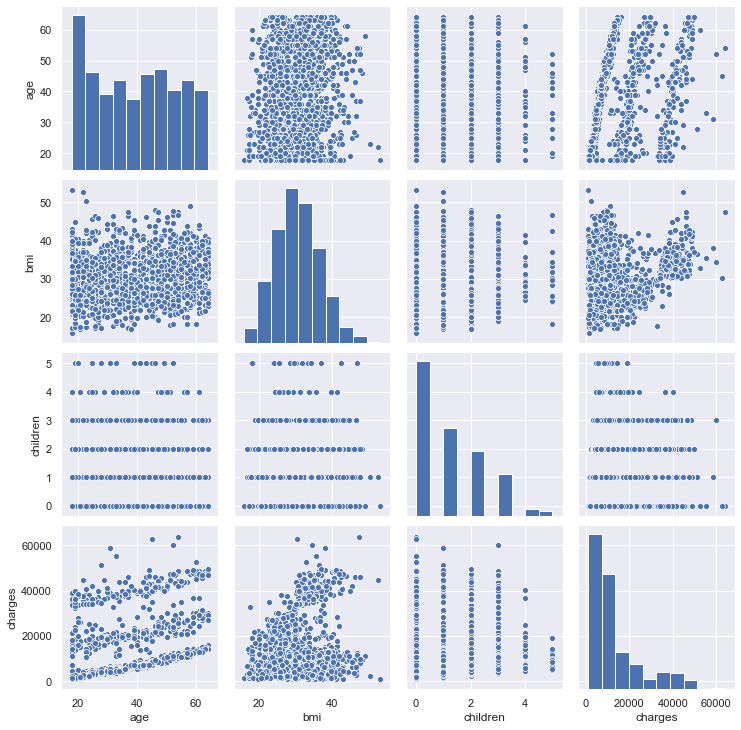

In [20]:
sns.pairplot(insurance_df)

# Analyzing trends, patterns, and relationships in the Data.

In [31]:
# Do charges of people who smoke differ significantly from the people who don't?


no     1064
yes     274
Name: smoker, dtype: int64

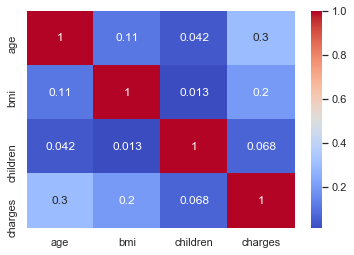

In [21]:
sns.heatmap(insurance_df.corr(), cmap = 'coolwarm', annot = True)

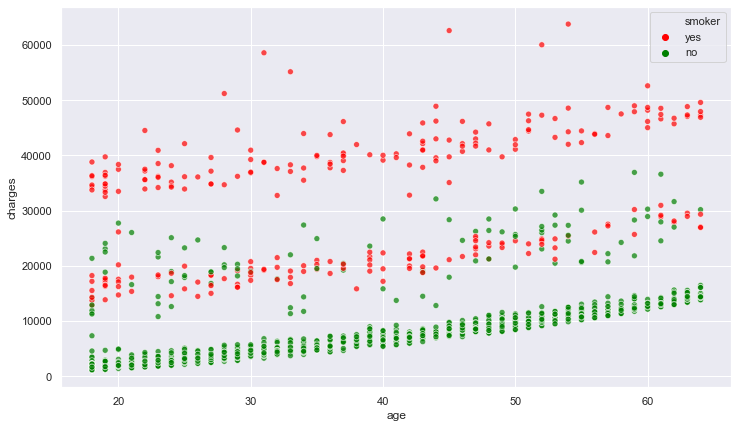

In [22]:
# Scatter plot to look for visual evidence of dependency between attributes smoker and charges accross different ages
plt.figure(figsize=(12,7))
sns.scatterplot(insurance_df.age, insurance_df.charges, hue=insurance_df.smoker, palette=["red", "green"], alpha=0.7)
plt.show()

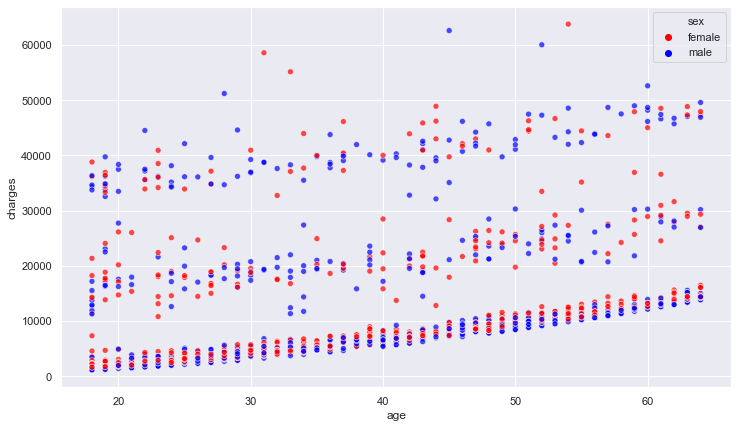

In [23]:
plt.figure(figsize=(12,7))
sns.scatterplot(insurance_df.age, insurance_df.charges, hue=insurance_df.sex, palette=["red", "blue"], alpha=0.7)
plt.show()

In [26]:
insurance_df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [24]:
# T-test to check dependency of smoking on charges
H0="Charges of smoker and non-smoker are the same"
Ha="Charges of smoker and non-smoker are not the same"

a=np.array(insurance_df[insurance_df.smoker=="yes"].charges)
b=np.array(insurance_df[insurance_df.smoker=="no"].charges)

t, p_value=stats.ttest_ind(a,b, axis=0)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')


Charges of smoker and non-smoker are not the same as the p_value (8.271435842177219e-283) < 0.05


In [30]:
#Does bmi of males differ significantly from that of females?
H0="gender has no effect on bmi"
Ha="gender has effect on bmi"

a=np.array(insurance_df[insurance_df.sex=="male"].bmi)
b=np.array(insurance_df[insurance_df.sex=="female"].bmi)

t, p_value=stats.ttest_ind(a,b, axis=0)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{H0} as the p_value ({p_value}) > 0.05')

gender has no effect on bmi as the p_value (0.08997637178984932) > 0.05


In [33]:
# Hasan hocamızın gönrderdiği kod:
ttest2=stats.ttest_ind(insurance_df.bmi[insurance_df["sex"]=="male"],insurance_df.bmi[insurance_df["sex"]=="female"])
if ttest2[1]<0.05:
    print(f"Gender has effect on bmi as the p_value {ttest2[1]} < 0.05")
else:
    print(f"Gender has no effect on bmi as the p_value {round(ttest2[1],2)} > 0.05")

Gender has no effect on bmi as the p_value 0.09 > 0.05
